# The Normal Distribution

### So far

We have derived the three main formula for a problem with binomial distribution (Coin toss).  For ```n``` no of flips, with probability of heads p being 0.5 at each flip, and q = 1 - p, we could calculate  

#### 1. Probability of X = k  

$$
\color {blue} {p(X=k; n,p) \ = \ \dfrac {n!}{k!(n-k)!}p^{k}q^{n-k} \ , \ X = 0,1,2,....n}
$$

#### 2. Mean  

$$
\color {blue} {\mu = E(X) = np}
$$

#### 3. Variance  

$$
\color {blue} {\sigma^2 = Var(X) = npq}
$$

### Introduction
When n is very high, even after 20 flips, it is computationally challenging to calculate all the possible combinations because the complexity grows exponentially. This calls for certain approximation for large no of flips. This is where we try to approximate with another continous function called [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution). 

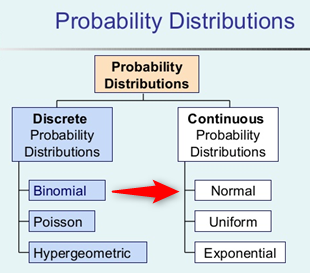

There is a huge history behind coming up with such approximation for error curves, and [1](https://www.maa.org/sites/default/files/pdf/upload_library/22/Allendoerfer/stahl96.pdf) is one interesting article that talks in detail about Normal curve. Obviously we will go in to detail but try to prove how the continuous function fits our error cuve. 

### Visual Proof

In its raw form, a simple probability density error function $\varphi(x)$ looks like below.  

$$
{\varphi (x)={\dfrac {1}{\sqrt {2\pi }}}e^{-{\frac {1}{2}}x^{2}}}  \tag{1}
$$

Let us plot both $\varphi(x)$ and our binomial probability curve together. 

In [6]:
from coinflipviz import get_combinations_consolidated

n_flips = 20
final_df = get_combinations_consolidated(n_flips)

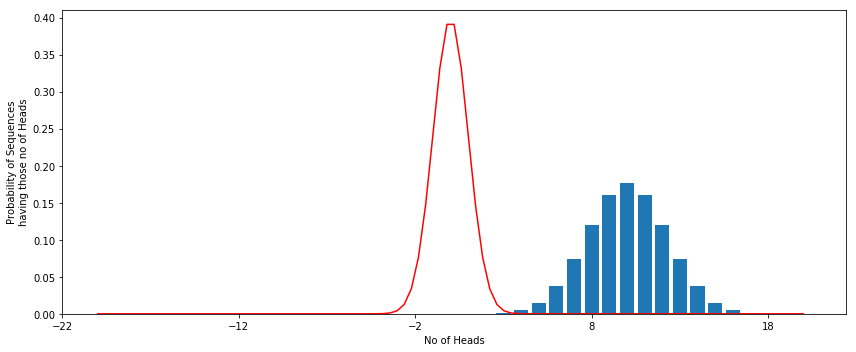

In [7]:
from bi_to_nor_demo import plot_bi_nor
    
plot_bi_nor(final_df, C='1/(sqrt(2*pi))', E='-(X**2)/2')

$\varphi(x)$ looks taller, and placed on left side. At the moment, does not give any hope it could be a good approximation. But let us manipulate the curve next. 

#### Shift to right

Note, $\varphi(x)$ is centered at X=0, we need to be centered at X=10, which is the mean of our problem. So we just do that.  

$$
{\varphi (x)={\dfrac {1}{\sqrt {2\pi }}}e^{-{\frac {1}{2}}(x-\color{blue}{\mu})^{2}}}  
$$

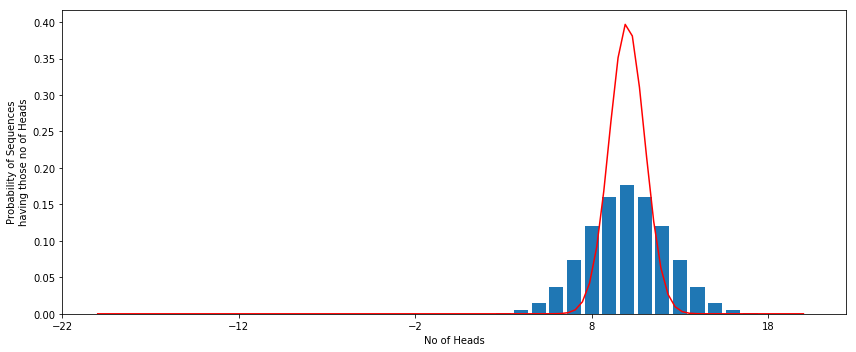

In [8]:
plot_bi_nor(final_df, mu=10, C='1/(sqrt(2*pi))', E='-((X-mu)**2)/2')  # note (X-mu) term in E denoting the shift

#### Scale down

Of course now $\varphi(x)$ is taller, so let us scale down by $\sigma$ 

$$
{\varphi (x)={\dfrac {1}{\color{blue}{\sigma} \sqrt {2\pi }}}e^{-{\dfrac {1}{2}}(x-\color{blue}{\mu})^{2}}} 
$$

Remember, our $\sigma^2$ was 5, so $\sigma$ would be 2.236

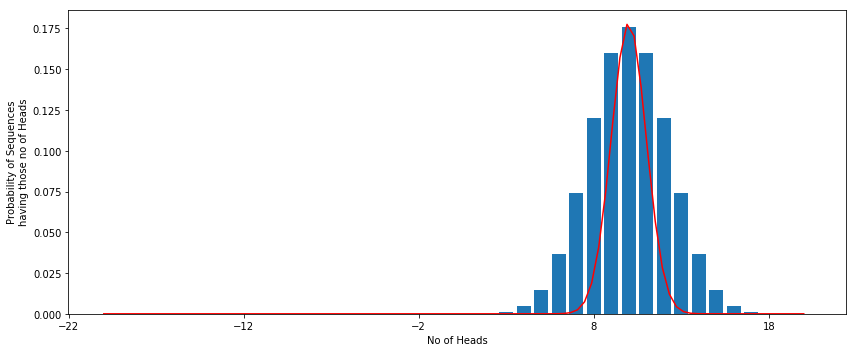

In [9]:
plot_bi_nor(final_df, sigma=2.236, mu=10, C='1/(sigma*sqrt(2*pi))', E='-((X-mu)**2)/2')  

#### Stretch it 

$\varphi(x)$ is thinner, so still not quite approximate. To stretch let us divide the power of exponent by $\sigma$. Note we are operating on X value, so just like $\mu$, the $\sigma$ happens before squaring up X.  

$$
\varphi (x)={\frac {1}{\color{blue}{\sigma} \sqrt {2\pi }}}
e^{-\dfrac {1}{2}\Big( \dfrac {x - \mu}{\color {blue}{\sigma}} \Big)^2}
$$

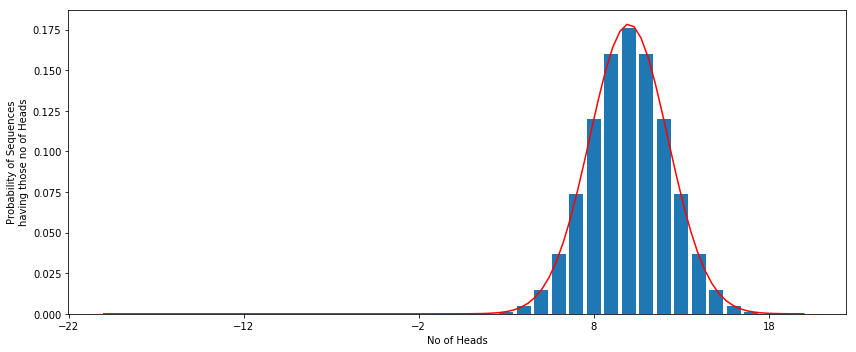

In [10]:
plot_bi_nor(final_df, sigma=2.236, mu=10, C='1/(sigma*sqrt(2*pi))', E='-(((X-mu)/sigma)**2)/2')  

Now I hope, it is visually satisfactory to accept, the normal approximation function $\varphi(x)$ as replacement for large **n**

### Mathematical Proof  

It can also be proven mathematically that, binomial function could be approximated by normal probability density function we just saw, however it is quite tedious, also skipped in Udacity. We will try some time in future.  

For those interested, there are multiple ways to prove but I find [De Moivre-Laplace](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem) to be most straight forward starting from our binomial distribution problem.  

### Conclusion

Thus, a binomial distribution problem with sufficiently large **n**, such that $np \geq 10$, can be approximate by normal probability density function as below, where $\mu$ and $\sigma$ are mean and standard deviation respectively.  

$$
\color {blue} 
{\varphi (x)={\frac {1}{\sigma \sqrt {2\pi} }}
e^{-\dfrac {1}{2}\Big( \dfrac {x - \mu}{\sigma} \Big)^2}  \tag {2}}
$$

where, 
$
\mu = np \ , \  \sigma = np(1-p)
$

### Tips

#### Continuity Correction

$P(X=k)$ in binomial $\neq$ $p(X=k)$ in Normal  
In fact, $p(X=k)$ in Normal is zero because it is a continous function. So always consider taking closest range.   
For eg, for $P(X=8)$ in binomial, if you use Normal, you could try $p(7.5<X<8.5)$. This is called continuity correction.  

Remember, binomial distribution is discrete, while normal is continous.  